In [498]:
import spacy

In [499]:
import re

In [500]:
from spacy.lang.id import Indonesian

In [501]:
from __future__ import unicode_literals

In [502]:
nlp = Indonesian()

In [503]:
nlp = spacy.blank('id')

In [504]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter

In [505]:
df = pd.read_csv('detikcomnews_clean.csv')

In [506]:
stop_words = pd.read_fwf('stopwords.txt')

In [507]:
df.head()

,Unnamed: 0,newstitle
0,0,"Soal Proyek Tol Yogya-Bawen, Kemenko Ekonomi: ..."
1,1,Akses dari Tol Trans Jawa ke Jalan Nasional Ma...
2,2,Bendungan Mila Siap Alirkan Air ke 1.689 Ha La...
3,3,Pejabat Kementerian PUPR Kena OTT KPK
4,4,"Bertemu Jokowi, Ridwan Kamil Ingin Situ Bagend..."


In [508]:
df1 = df.drop(columns=['Unnamed: 0'])

In [509]:
df1.tail()

,newstitle
2904,Begini Mulusnya Jalan Perbatasan NTT-Timor Leste
2905,"Libur Akhir Tahun ke Sumbar, Ada Area Wisata B..."
2906,Ada Area Wisata Unik di Jembatan Kelok Sembilan
2907,"Kasus Suap di Kementerian PUPR, Politikus PKS ..."
2908,Golkar Dorong KPK Seriusi Kasus e-KTP dan Perk...


In [510]:
df1.insert(1, "media", "detik")

In [511]:
df1.head()

,newstitle,media
0,"Soal Proyek Tol Yogya-Bawen, Kemenko Ekonomi: ...",detik
1,Akses dari Tol Trans Jawa ke Jalan Nasional Ma...,detik
2,Bendungan Mila Siap Alirkan Air ke 1.689 Ha La...,detik
3,Pejabat Kementerian PUPR Kena OTT KPK,detik
4,"Bertemu Jokowi, Ridwan Kamil Ingin Situ Bagend...",detik


In [512]:
df1.isnull().sum()

newstitle    0
media        0
dtype: int64

In [513]:
import sklearn

In [514]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.33, random_state=42)

In [515]:
#punctuations = string.punctuation

In [516]:
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("processed %d out if %d documents." % (counter, len(docs)))
            
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [toks.lemma_.lower().strip() for tok in doc if tok.lemma_ !='-PRON-']
        tokens = [tok for to in tokens if tok not in stop_words and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [517]:
train['newstitle'] = train['newstitle'].str.replace(',', '')

In [518]:
train['newstitle'] = train['newstitle'].str.replace(':', '')

In [519]:
train['newstitle'] = train['newstitle'].str.replace('?', '')
train['newstitle'] = train['newstitle'].str.replace('di', '')
train['newstitle'] = train['newstitle'].str.replace('ke', '')
train['newstitle'] = train['newstitle'].str.replace('Rp', '')
train['newstitle'] = train['newstitle'].str.replace('dan', '')
train['newstitle'] = train['newstitle'].str.replace('yang', '')
train['newstitle'] = train['newstitle'].str.replace('Bisa', '')
train['newstitle'] = train['newstitle'].str.replace('2018', '')
train['newstitle'] = train['newstitle'].str.replace('Tahun', '')
train['newstitle'] = train['newstitle'].str.replace('untuk', '')
train['newstitle'] = train['newstitle'].str.replace('Ada', '')
train['newstitle'] = train['newstitle'].str.replace('Baru', '')
train['newstitle'] = train['newstitle'].str.replace('dalam', '')


In [520]:
detik_text = [text for text in train[train['media'] == 'detik']
['newstitle']]

In [521]:
detik_text

[u'7 Pos Perbatasan dengan Negara Tetangga Dipercantik  Ini',
 u'Kata PDIP Soal Tuntutan Mati Koruptor',
 u'RI Gandeng Malaysia Perkuat Tenaga Kerja Sektor Konstruksi',
 u'Apiknya Rusun  Pesantren Garut  Dikunjungi Jokowi',
 u' Jalan Trans Papua Sorong-Merau Tersambung Aspal 4.330 Km',
 u'Tol Jakarta-Surabaya Bensin Keliling Disiapkan  Brebes-Semarang',
 u'Pembangunan Bendungan Pamukkulu  Sulawesi Segera Dimulai',
 u'Drainase  Jalur Bandung-Garut Tuntas Sebelum Arus Muk',
 u'Proyek Kanal Cikarang Bekasi Laut Dimulai Semester I-',
 u'Progres Bendungan Way Sekampung  Lampung Capai 42%',
 u'Apa Kabar Rencana Tarif Tol JORR Jauh-Dekat  15.000',
 u'Apa Kabar Proyek Pembangunan Jalan  Perbatasan RI-Malaysia',
 u'4  Jokowi-JK Panjang Jalan Tol Bertambah 42317 Km',
 u'Nama Musa Muncul  Dakwaan Pejabat PUPR KPK Ini Amunisi Penting',
 u'Sejumlah Pejabat  Kemen PUPR Mengaku Terima THR dari Amran',
 u'Tim Ekspesi Diterjunkan Pantau Trans Papua Begini Penampakannya',
 u'Menteri PUPR Merapat  Kantor

In [522]:
import nltk
from nltk.tokenize import word_tokenize

In [523]:
import sys

reload(sys)  
sys.setdefaultencoding('utf8')

In [524]:
joint_words = ' '.join(detik_text)

separated_words = word_tokenize(joint_words)

In [525]:
separated_words

[u'7',
 u'Pos',
 u'Perbatasan',
 u'dengan',
 u'Negara',
 u'Tetangga',
 u'Dipercantik',
 u'Ini',
 u'Kata',
 u'PDIP',
 u'Soal',
 u'Tuntutan',
 u'Mati',
 u'Koruptor',
 u'RI',
 u'Gandeng',
 u'Malaysia',
 u'Perkuat',
 u'Tenaga',
 u'Kerja',
 u'Sektor',
 u'Konstruksi',
 u'Apiknya',
 u'Rusun',
 u'Pesantren',
 u'Garut',
 u'Dikunjungi',
 u'Jokowi',
 u'Jalan',
 u'Trans',
 u'Papua',
 u'Sorong-Merau',
 u'Tersambung',
 u'Aspal',
 u'4.330',
 u'Km',
 u'Tol',
 u'Jakarta-Surabaya',
 u'Bensin',
 u'Keliling',
 u'Disiapkan',
 u'Brebes-Semarang',
 u'Pembangunan',
 u'Bendungan',
 u'Pamukkulu',
 u'Sulawesi',
 u'Segera',
 u'Dimulai',
 u'Drainase',
 u'Jalur',
 u'Bandung-Garut',
 u'Tuntas',
 u'Sebelum',
 u'Arus',
 u'Muk',
 u'Proyek',
 u'Kanal',
 u'Cikarang',
 u'Bekasi',
 u'Laut',
 u'Dimulai',
 u'Semester',
 u'I-',
 u'Progres',
 u'Bendungan',
 u'Way',
 u'Sekampung',
 u'Lampung',
 u'Capai',
 u'42',
 u'%',
 u'Apa',
 u'Kabar',
 u'Rencana',
 u'Tarif',
 u'Tol',
 u'JORR',
 u'Jauh-Dekat',
 u'15.000',
 u'Apa',
 u'Kabar',

In [526]:
detik_counts = Counter(separated_words)

In [527]:
detik_common_words = [word[0] for word in detik_counts.most_common(20)]
detik_common_counts = [word[1] for word in detik_counts.most_common(20)]

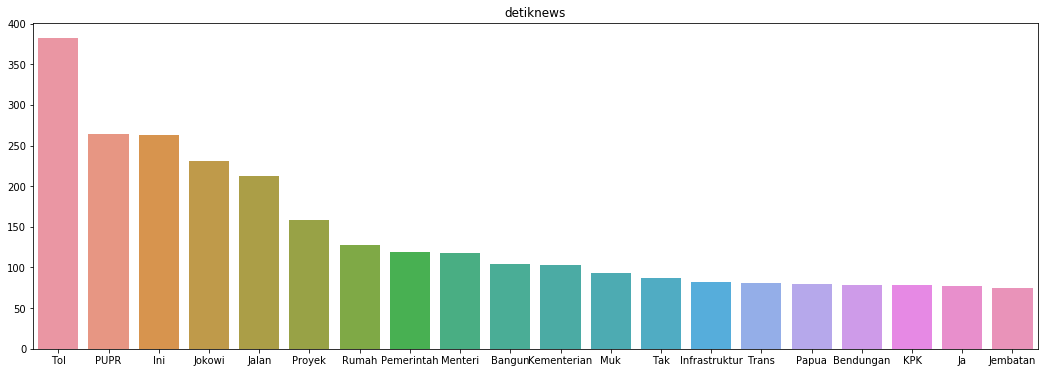

In [528]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=detik_common_words, y=detik_common_counts)
plt.title('detiknews')
plt.show()

In [540]:
df1['newstitle'] = df1['newstitle'].str.replace('?', '')
df1['newstitle'] = df1['newstitle'].str.replace('di', '')
df1['newstitle'] = df1['newstitle'].str.replace('ke', '')
df1['newstitle'] = df1['newstitle'].str.replace('Rp', '')
df1['newstitle'] = df1['newstitle'].str.replace('dan', '')
df1['newstitle'] = df1['newstitle'].str.replace('yang', '')
df1['newstitle'] = df1['newstitle'].str.replace('Bisa', '')
df1['newstitle'] = df1['newstitle'].str.replace('2018', '')
df1['newstitle'] = df1['newstitle'].str.replace('Tahun', '')
df1['newstitle'] = df1['newstitle'].str.replace('untuk', '')
df1['newstitle'] = df1['newstitle'].str.replace('Ada', '')
df1['newstitle'] = df1['newstitle'].str.replace('Baru', '')
df1['newstitle'] = df1['newstitle'].str.replace('dalam', '')
df1['newstitle'] = df1['newstitle'].str.replace(',', '')
df1['newstitle'] = df1['newstitle'].str.replace(':', '')
df1['newstitle'] = df1['newstitle'].str.replace('Muk', '')
df1['newstitle'] = df1['newstitle'].str.replace('Tak', '')
df1['newstitle'] = df1['newstitle'].str.replace('Ini', '')


In [541]:
#df1.newstitle = [x.strip('?') for x in df.newstitle]

In [544]:
df1_text = [text for text in df1[df1['media'] == 'detik']
['newstitle']]

In [545]:
df1_joint_words = ' '.join(df1_text)

df1_separated_words = word_tokenize(df1_joint_words)

In [546]:
df1_separated_words

[u'Soal',
 u'Proyek',
 u'Tol',
 u'Yogya-Bawen',
 u'Kemenko',
 u'Ekonomi',
 u'Tunggu',
 u'Jateng',
 u'O',
 u'Akses',
 u'dari',
 u'Tol',
 u'Trans',
 u'Jawa',
 u'Jalan',
 u'Nasional',
 u'Masih',
 u'Kurang',
 u'Memadai',
 u'Bendungan',
 u'Mila',
 u'Siap',
 u'Alirkan',
 u'Air',
 u'1.689',
 u'Ha',
 u'Lahan',
 u'Dompu',
 u'Pejabat',
 u'Kementerian',
 u'PUPR',
 u'Kena',
 u'OTT',
 u'KPK',
 u'Bertemu',
 u'Jokowi',
 u'Ridwan',
 u'Kamil',
 u'Ingin',
 u'Situ',
 u'Bagent',
 u'Ja',
 u'Destinasi',
 u'Dunia',
 u'Jokowi',
 u'Tinjau',
 u'Bantuan',
 u'Rusun',
 u'Ponpes',
 u'Ustaz',
 u'A',
 u'Hidayat',
 u'Belajar',
 u'5',
 u'Objek',
 u'Wisata',
 u'Populer',
 u'Jawa',
 u'Tengah',
 u'Kalah',
 u'dengan',
 u'Malaysia',
 u'Apiknya',
 u'Rusun',
 u'Pesantren',
 u'Garut',
 u'Dikunjungi',
 u'Jokowi',
 u'Warga',
 u'Pag',
 u'Nikmati',
 u'Program',
 u'Hibah',
 u'Air',
 u'Melihat',
 u'Infrastruktur',
 u'Jalan',
 u'Jembatan',
 u'Pulau',
 u'Terdepan',
 u'RI',
 u'Bendungan',
 u'Rotiklot',
 u'Perbatasan',
 u'RI-Timor',
 u'

In [547]:
df1_count = Counter(df1_separated_words)

In [550]:
df1_common_words = [word[0] for word in df1_count.most_common(10)]
df1_common_counts = [word[1] for word in df1_count.most_common(10)]

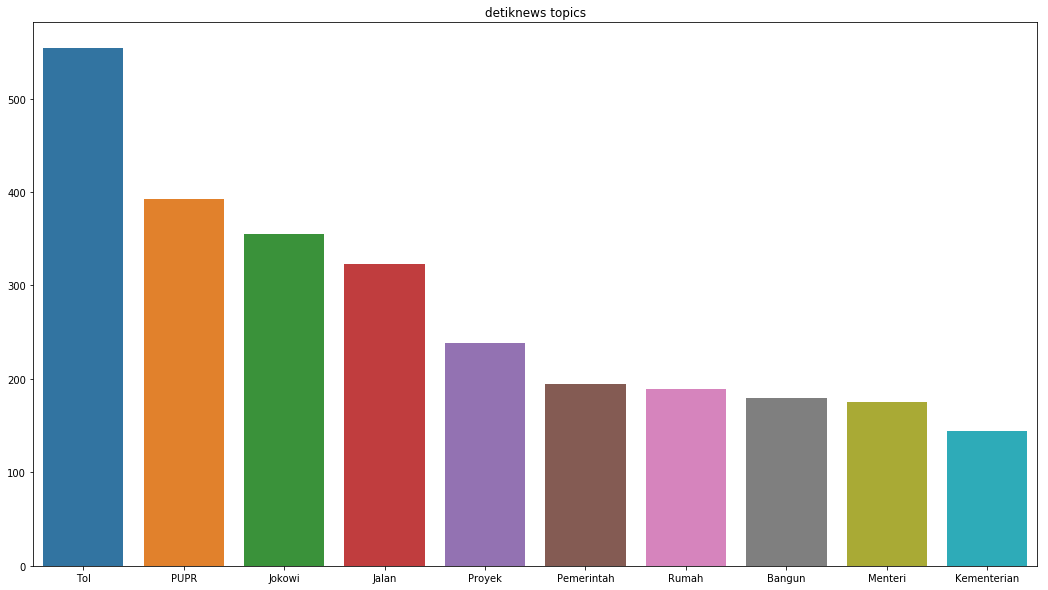

In [551]:
fig = plt.figure(figsize=(18,10))
sns.barplot(x=df1_common_words, y=df1_common_counts)
plt.title('detiknews topics')
plt.show()